# Importing Libraries

In [1]:
!pip install keras
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

In [7]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split

# Loading the dataset

In [8]:
data = pd.read_csv(r"C:\Excelr assignments\Assignment 16 Neural Networks\forestfires (1).csv")
data.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


# EDA

In [9]:
data1 = data.drop(columns=['month','day'])

In [10]:
data1.shape

(517, 29)

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [12]:
data1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

# Convereting y variable

In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
label = LabelEncoder()

In [16]:
data1['size_category'] = label.fit_transform(data1['size_category'])

In [17]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

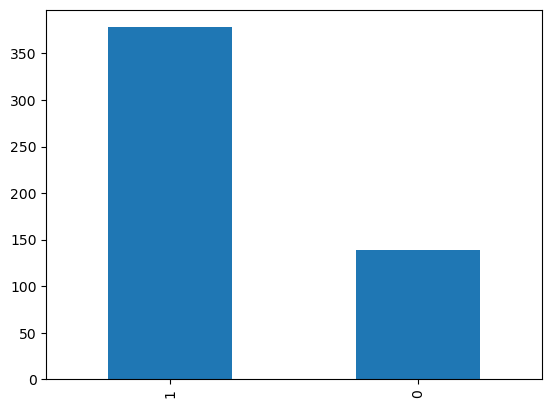

In [18]:
data1.size_category.value_counts().plot(kind='bar')

In [42]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1:]

# Standardization of x variable

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_standard = scaler.fit_transform(x.values)
x_standard

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

# Importing necessary libraries

In [37]:
!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


In [39]:
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Building the model

# Tuning of Hyperparameters : Batch size and Epoch

In [57]:
def create_model ():
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam , metrics = ['accuracy'] )
    return model

In [58]:
#create the keraclassifier model
model = KerasClassifier(model=create_model,verbose=0)
#define the grid search paramters
batch_size =[10,20,30,40,50]
epochs = [10,50,100]
#making dictionary of the grid paramters
param_grid = dict(batch_size=batch_size,epochs=epochs)
#build and fit the GridsearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid,verbose=10,cv=KFold())
grid_results = grid.fit(x_standard,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START batch_size=10, epochs=10...................................
[CV 1/5; 1/15] END ....batch_size=10, epochs=10;, score=0.962 total time=   1.2s
[CV 2/5; 1/15] START batch_size=10, epochs=10...................................
[CV 2/5; 1/15] END ....batch_size=10, epochs=10;, score=0.837 total time=   0.9s
[CV 3/5; 1/15] START batch_size=10, epochs=10...................................
[CV 3/5; 1/15] END ....batch_size=10, epochs=10;, score=0.883 total time=   0.9s
[CV 4/5; 1/15] START batch_size=10, epochs=10...................................
[CV 4/5; 1/15] END ....batch_size=10, epochs=10;, score=0.854 total time=   0.9s
[CV 5/5; 1/15] START batch_size=10, epochs=10...................................
[CV 5/5; 1/15] END ....batch_size=10, epochs=10;, score=0.874 total time=   0.9s
[CV 1/5; 2/15] START batch_size=10, epochs=50...................................
[CV 1/5; 2/15] END ....batch_size=10, epochs=50;

In [62]:
#summary of the model
print('best :{}, using {} '.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , stdev, param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean, stdev,param))

best :0.9148244958924572, using {'batch_size': 10, 'epochs': 50} 
0.8819454817027633,0.04295643829852373 with:{'batch_size': 10, 'epochs': 10}
0.9148244958924572,0.04784240968445776 with:{'batch_size': 10, 'epochs': 50}
0.9089805825242718,0.04994341222368771 with:{'batch_size': 10, 'epochs': 100}
0.8489544436146378,0.07282613718016034 with:{'batch_size': 20, 'epochs': 10}
0.8974234503360716,0.0563880329157951 with:{'batch_size': 20, 'epochs': 50}
0.9051157580283794,0.04982460097859336 with:{'batch_size': 20, 'epochs': 100}
0.8412434652725915,0.08652349754168402 with:{'batch_size': 30, 'epochs': 10}
0.9109410007468259,0.040735019267927025 with:{'batch_size': 30, 'epochs': 50}
0.9031740104555638,0.04930233863673523 with:{'batch_size': 30, 'epochs': 100}
0.7655339805825243,0.14490350803126986 with:{'batch_size': 40, 'epochs': 10}
0.9090179238237491,0.04827132473543309 with:{'batch_size': 40, 'epochs': 50}
0.9148058252427184,0.04548883016220436 with:{'batch_size': 40, 'epochs': 100}
0.7441

# Tuning Hyperparameter :Learning rate and Dropout rate

In [63]:
from keras.layers import Dropout

In [79]:
#creating the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer='normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28, kernel_initializer='normal',activation ='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
              
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
    return model          

In [80]:
#create a keras classifer model
model = KerasClassifier(model=create_model,verbose=0,batch_size=10,epochs=50,learning_rate = [0.001,0.01,0.1],dropout_rate =[0.0,0.1,0.2])
#creating gridsearch cv paramters dict
param_grid = dict(learning_rate =learning_rate,dropout_rate= dropout_rate)
#build and fit the gridsearchcv
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_results = grid.fit(x_standard,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.01, learning_rate=0.001......................
[CV 1/5; 1/6] END dropout_rate=0.01, learning_rate=0.001;, score=0.990 total time=   2.3s
[CV 2/5; 1/6] START dropout_rate=0.01, learning_rate=0.001......................
[CV 2/5; 1/6] END dropout_rate=0.01, learning_rate=0.001;, score=0.865 total time=   2.4s
[CV 3/5; 1/6] START dropout_rate=0.01, learning_rate=0.001......................
[CV 3/5; 1/6] END dropout_rate=0.01, learning_rate=0.001;, score=0.932 total time=   2.3s
[CV 4/5; 1/6] START dropout_rate=0.01, learning_rate=0.001......................
[CV 4/5; 1/6] END dropout_rate=0.01, learning_rate=0.001;, score=0.835 total time=   2.3s
[CV 5/5; 1/6] START dropout_rate=0.01, learning_rate=0.001......................
[CV 5/5; 1/6] END dropout_rate=0.01, learning_rate=0.001;, score=0.883 total time=   2.3s
[CV 1/5; 2/6] START dropout_rate=0.01, learning_rate=0.01.......................
[CV 

In [81]:
#summary of the model
print('best :{}, using {} '.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , stdev, param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean, stdev,param))

best :0.9264189693801346, using {'dropout_rate': 0.01, 'learning_rate': 0.01} 
0.901250933532487,0.05457103549625955 with:{'dropout_rate': 0.01, 'learning_rate': 0.001}
0.9264189693801346,0.03895363392428824 with:{'dropout_rate': 0.01, 'learning_rate': 0.01}
0.7655339805825243,0.16280311535389005 with:{'dropout_rate': 0.01, 'learning_rate': 0.1}
0.8992531740104557,0.051160796440608954 with:{'dropout_rate': 0.02, 'learning_rate': 0.001}
0.9206497386109037,0.04538312281413783 with:{'dropout_rate': 0.02, 'learning_rate': 0.01}
0.7425504107542944,0.12116049679683634 with:{'dropout_rate': 0.02, 'learning_rate': 0.1}


# Tuning the Hyperparameter: Activation function and kernel Initilizer

In [112]:
# Define the create_model function
def create_model(activation_function='relu', init='uniform'):
    model = Sequential()
    model.add(Dense(8, input_dim=28, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(4, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(0.01))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(model=create_model, verbose=0, batch_size=40, epochs=10,activation_function = ['relu','tanh','liner','softmax'],init = ['uniform','normal','zero'])

# Define the search grid parameters
param_grid = {
    'activation_function': ['relu', 'tanh', 'linear', 'softmax'],
    'init': ['uniform', 'normal', 'zero']
}

# Build and fit the grid search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_results = grid.fit(x_standard, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=relu, init=uniform.....................
[CV 1/5; 1/12] END activation_function=relu, init=uniform;, score=0.981 total time=   0.8s
[CV 2/5; 1/12] START activation_function=relu, init=uniform.....................
[CV 2/5; 1/12] END activation_function=relu, init=uniform;, score=0.750 total time=   0.8s
[CV 3/5; 1/12] START activation_function=relu, init=uniform.....................
[CV 3/5; 1/12] END activation_function=relu, init=uniform;, score=0.524 total time=   0.8s
[CV 4/5; 1/12] START activation_function=relu, init=uniform.....................
[CV 4/5; 1/12] END activation_function=relu, init=uniform;, score=0.757 total time=   0.8s
[CV 5/5; 1/12] START activation_function=relu, init=uniform.....................
[CV 5/5; 1/12] END activation_function=relu, init=uniform;, score=0.767 total time=   0.8s
[CV 1/5; 2/12] START activation_function=relu, init=normal.....................

In [113]:
#summary of the model
print('best :{}, using {} '.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , stdev, param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean, stdev,param))

best :0.8819081404032859, using {'activation_function': 'tanh', 'init': 'uniform'} 
0.7558625840179238,0.1444835489203936 with:{'activation_function': 'relu', 'init': 'uniform'}
0.7771471247199402,0.14955625616606205 with:{'activation_function': 'relu', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with:{'activation_function': 'relu', 'init': 'zero'}
0.8819081404032859,0.06001084909749684 with:{'activation_function': 'tanh', 'init': 'uniform'}
0.8624906646751306,0.06703590122515476 with:{'activation_function': 'tanh', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with:{'activation_function': 'tanh', 'init': 'zero'}
0.8722367438386855,0.06942699620276004 with:{'activation_function': 'linear', 'init': 'uniform'}
0.8741784914115011,0.06255432276338845 with:{'activation_function': 'linear', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with:{'activation_function': 'linear', 'init': 'zero'}
0.7305825242718447,0.15435061257849172 with:{'activation_function': 

# Tuning the Hyperparameter: Number of Neuron in activation layers

In [118]:
# Define the create_model function
def create_model(neuron1=4, neuron2=2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=28, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(model=create_model, verbose=0, batch_size=40, epochs=10,neuron1=4, neuron2=2)

# Define the parameter grid
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# Make the dictionary of the parameter grid
param_grid = dict(neuron1=neuron1, neuron2=neuron2)

# Build and fit the grid search CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_results = grid.fit(x_standard, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.990 total time=   0.8s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.788 total time=   0.8s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.796 total time=   6.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.806 total time=   0.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.835 total time=   0.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [119]:
#summary of the model
print('best :{}, using {} '.format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , stdev, param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean, stdev,param))

best :0.8896938013442867, using {'neuron1': 8, 'neuron2': 8} 
0.8431478715459297,0.07528793138427235 with:{'neuron1': 4, 'neuron2': 2}
0.8567961165048544,0.04792679780952893 with:{'neuron1': 4, 'neuron2': 4}
0.8780246452576549,0.053563669919383015 with:{'neuron1': 4, 'neuron2': 8}
0.8491038088125468,0.04588764102289429 with:{'neuron1': 8, 'neuron2': 2}
0.8857729648991786,0.056499267950852035 with:{'neuron1': 8, 'neuron2': 4}
0.8896938013442867,0.06669018093839948 with:{'neuron1': 8, 'neuron2': 8}
0.8702389843166543,0.06296209840801327 with:{'neuron1': 16, 'neuron2': 2}
0.8895631067961165,0.05966135936991665 with:{'neuron1': 16, 'neuron2': 4}
0.8837565347274084,0.06223839176747916 with:{'neuron1': 16, 'neuron2': 8}


# Training the the model with all the optimum parameter

In [120]:
from sklearn.metrics import accuracy_score,classification_report
# Define the create_model function
def create_model(neuron1=8, neuron2=8):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=28, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model

model = KerasClassifier(model=create_model, verbose=0, batch_size=40, epochs=10,neuron1=8, neuron2=8)

#fitting the model

model.fit(x_standard,y)

#predicting using trained model

y_pred = model.predict(x_standard)

#printing the metrics
print(accuracy_score(y,y_pred))




0.9613152804642167
